## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Reading the dataset
Spam Mails Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data cleaning

In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['label', 'message']
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5572, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

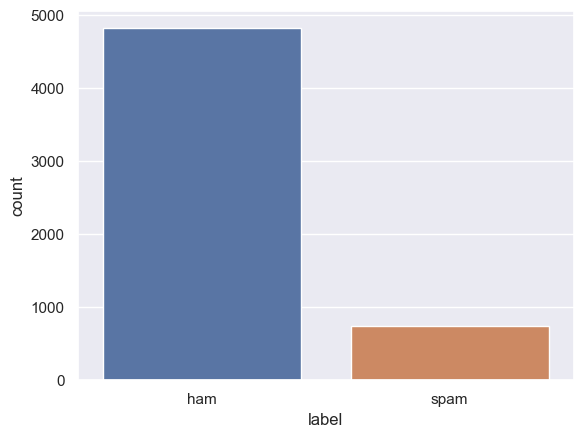

In [6]:
sns.countplot(x='label', data=df)

## Converting text to vectors and splitting the data into train/test

In [7]:
cv = CountVectorizer()

# independent variable
X = cv.fit_transform(df['message'])

X_train, X_test, Y_train, Y_test = train_test_split(X, df['label'], test_size=0.2, random_state=10)

## Training the model

In [8]:
# Multinomial Naive Bayes is suitable for classification with discrete features (e.g., word counts for text classification).
model = MultinomialNB()

In [9]:
model.fit(X_train, Y_train)

MultinomialNB()

## Model's Performance

In [10]:
train_acc = model.score(X_train, Y_train)
test_acc = model.score(X_test, Y_test)
print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.9937177473636976
Test accuracy:  0.9838565022421525


## Confusion Matrix

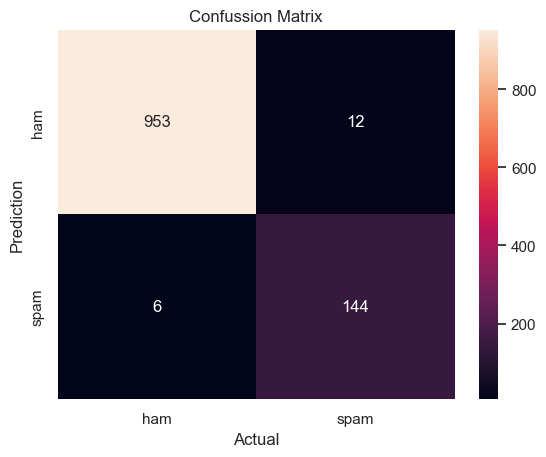

In [11]:
pred = model.predict(X=X_test)
cm = confusion_matrix(y_pred=pred, y_true=Y_test)

def plot_confusion_matrix(cm):
    cm_df = pd.DataFrame(cm)
    sns.heatmap(cm_df, annot=True, fmt='g',
    xticklabels = ['ham', 'spam'],
    yticklabels = ['ham', 'spam'])
    plt.ylabel('Prediction')
    plt.xlabel('Actual')
    plt.title('Confussion Matrix')
    plt.show()
    
plot_confusion_matrix(cm)

**Correctly classified values:** 953 + 144 = 1097

**Total number of values:** 1115

**Overall accuracy:** 1097/1115 = 0.983856

In [ ]:
while True:
    msg = input("Type the message: ")
    msg = cv.transform([msg])
    m = model.predict(msg)
    print("This is a", m[0], "message")

Type the message: Congratulations! You've won a $1000 gift card. Claim it now!
This is a spam message
Type the message: Hi, are you available for a meeting tomorrow at 2 PM?
This is a ham message
Type the message: I'll be there in 10 minutes.
This is a ham message
Type the message: Free iPhone giveaway for the first 100 users. Hurry!
This is a spam message
